In [11]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime 
from collections import defaultdict
from scipy.stats import pearsonr

# Tweets Understanding

In [12]:
tweets = pd.read_csv('tweets.csv')

In [13]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   user_id         object
 2   retweet_count   object
 3   reply_count     object
 4   favorite_count  object
 5   num_hashtags    object
 6   num_urls        object
 7   num_mentions    object
 8   created_at      object
 9   text            object
dtypes: object(10)
memory usage: 1.0+ GB


## Counting NaN Values

In [14]:
tweets.isna().sum()

id                      2
user_id            217283
retweet_count      437134
reply_count        647878
favorite_count     647542
num_hashtags      1057524
num_urls           648623
num_mentions       854165
created_at              0
text               537721
dtype: int64

## Counting not numeric values

In [15]:
tweets['retweet_count'].unique()

array(['0', '1', '114', ..., 'mpc2', '8d5hy52d', 'rf24duucpb'],
      dtype=object)

In [16]:
tweets['favorite_count'].unique()

array(['0', '2', '1', ..., 'a58k', '09vtlcms9k', 'l25suv5'], dtype=object)

In [17]:
tweets['num_hashtags'].unique()

array(['0', '1', '2', ..., '6xppy0', 'lwpe', 'kmmt7p21sf'], dtype=object)

In [18]:
tweets['num_mentions'].unique()

array(['0', '1', '3', ..., 'd8j', 'mstagcw', '8155oi'], dtype=object)

In [19]:
tweets['reply_count'].unique()

array(['0', '0.0', nan, ..., 'krr4jjgnz', 'z8w0qvba', 'otsduzr'],
      dtype=object)

In [20]:
tweets['num_urls'].unique()

array(['0', '2', '1', ..., '0cyoe1vpd', 'y2o', 'ix0n'], dtype=object)

## Counting duplicates

In [21]:
tweets.duplicated().sum()

1952099

Check if there are some 'id' duplicated

In [22]:
tweets['id'].duplicated().sum()

1992560

## Searching for invalid timestamp

In [23]:
tweets.sort_values('created_at')

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
13650279,135373002511533272,14265485,0,0,0,0,0,0,1953-04-17 12:24:33,I am thinking about doing reading Reframing Or...
893377,1636701384,14587971,0,0,0,0,0,0,1953-05-18 17:30:55,posted a new recap: www.BRILLiantTV.blogspot.c...
10993947,9284586,14587971,0,0,0,0,0,0,1953-05-19 17:34:04,is sad that the first 29 minutes of Lost did n...
7412926,5712138692319955,14587971,0,0,0,0,0,0,1953-05-25 16:52:19,"He many not have shot the deputy, but Jason Ca..."
4509369,791939953,14587971,0,0,0,0,0,1,1953-05-26 00:38:33,@TheJay I'll take that bet! I don't see how it...
...,...,...,...,...,...,...,...,...,...,...
3263952,2098145777139152,1693274954,0,0,0,0,1,0,2040-04-27 10:55:49,NASA completes MESSENGER mission with expected...
8085909,61189828641,1671101821,0,0,0,0,0,1,2040-04-27 10:56:59,@NeuerFC I didn't know you understood German
7530230,255922107629755,1693274954,0,0,0,0,1,0,2040-04-27 11:00:33,احتدام القتال بريف اللاذقية إثر تقدم المعارضة:...
98909,98624327530762599,10352582,1,0,0,1,1,0,2040-04-27 11:01:08,Has Has ke Lot Pot = #ROFL https://t.co/lQUDV...


## Data Visualization

In [24]:
tweets['id'] = pd.to_numeric(tweets['id'], errors='coerce')
tweets['user_id'] = pd.to_numeric(tweets['user_id'], errors='coerce')
tweets['retweet_count'] = pd.to_numeric(tweets['retweet_count'], errors='coerce')
tweets['reply_count'] = pd.to_numeric(tweets['reply_count'], errors='coerce')
tweets['favorite_count'] = pd.to_numeric(tweets['favorite_count'], errors='coerce')
tweets['num_hashtags'] = pd.to_numeric(tweets['num_hashtags'], errors='coerce')
tweets['num_mentions'] = pd.to_numeric(tweets['num_mentions'], errors='coerce')
tweets['num_urls'] = pd.to_numeric(tweets['num_urls'], errors='coerce')
tweets['created_at'] = pd.to_datetime(tweets['created_at'], errors='coerce')

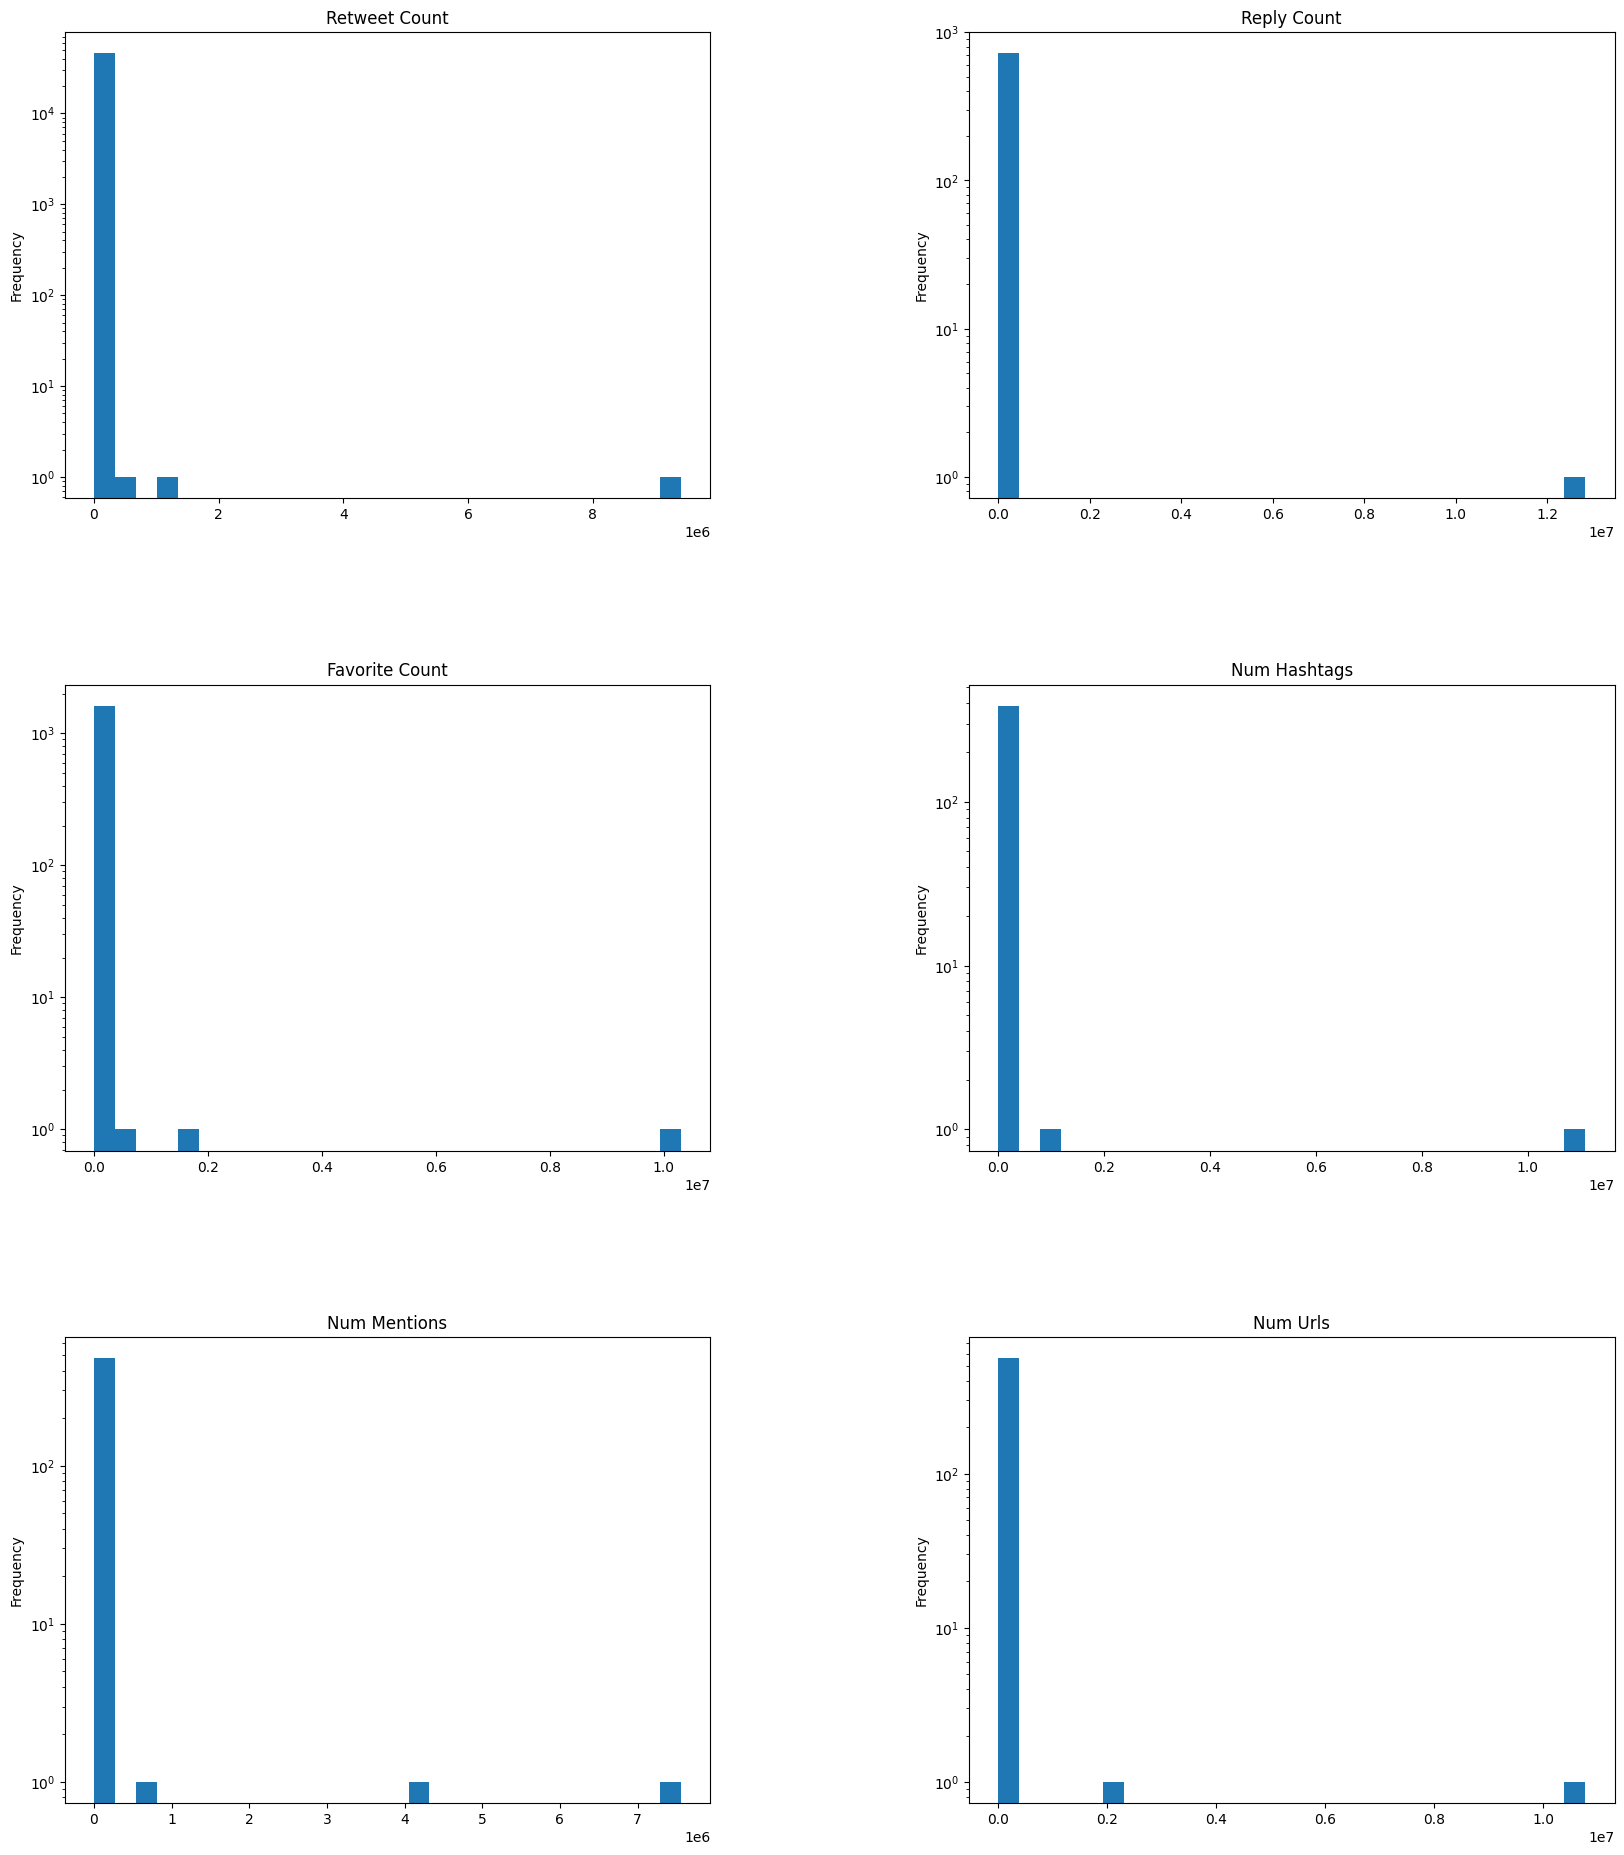

In [25]:
fig = plt.figure(figsize=(20,23))
fig_dims = (3,2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

###fig 1
plt.subplot2grid(fig_dims, (0,0))
tweets['retweet_count'].value_counts().plot.hist(bins=round(math.log2(tweets.size) + 1), logy=True, title='Retweet Count')
plt.yscale('log')


###fig 2
plt.subplot2grid(fig_dims, (0,1))
tweets['reply_count'].value_counts().plot.hist(bins=round(math.log2(tweets.size) + 1), logy=True, title='Reply Count')
plt.yscale('log')

###fig 3
plt.subplot2grid(fig_dims, (1,0))
tweets['favorite_count'].value_counts().plot.hist(bins=round(math.log2(tweets.size) + 1), logy=True, title='Favorite Count')
plt.yscale('log')

###fig 4
plt.subplot2grid(fig_dims, (1,1))
tweets['num_hashtags'].value_counts().plot.hist(bins=round(math.log2(tweets.size) + 1), logy=True, title='Num Hashtags')
plt.yscale('log')

###fig 5
plt.subplot2grid(fig_dims, (2,0))
tweets['num_mentions'].value_counts().plot.hist(bins=round(math.log2(tweets.size) + 1), logy=True, title='Num Mentions')
plt.yscale('log')

###fig 6
plt.subplot2grid(fig_dims, (2,1))
tweets['num_urls'].value_counts().plot.hist(bins=round(math.log2(tweets.size) + 1), logy=True, title='Num Urls')
plt.yscale('log')


plt.show()

## Outlier Analysis

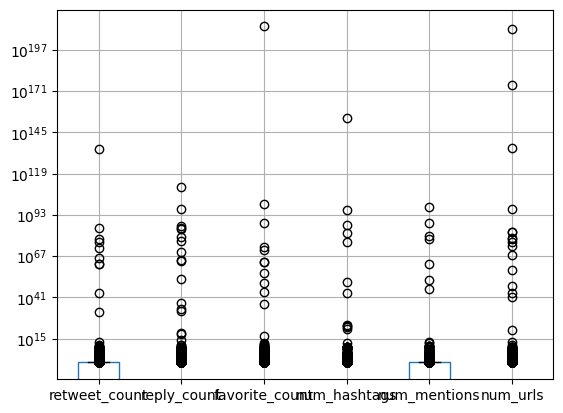

In [26]:
tweets.boxplot(column=['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_mentions', 'num_urls'])
plt.yscale('log')

# User Understanding

In [27]:
users = pd.read_csv('users.csv')

In [28]:
users.info()
users.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


id                  int64
name               object
lang               object
bot                 int64
created_at         object
statuses_count    float64
dtype: object

## Counting NaN Values

In [29]:
users.isna().sum()

id                  0
name                1
lang                0
bot                 0
created_at          0
statuses_count    399
dtype: int64

## Counting Duplicates

In [30]:
users.duplicated().sum()

0

## Searching for invalid language

In [31]:
users['lang'].unique()

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-AU', 'da', 'ar', 'en-GB',
       'Select Language...', 'zh-TW', 'zh-cn', 'pl', 'el', 'fil', 'sv',
       'xx-lc'], dtype=object)

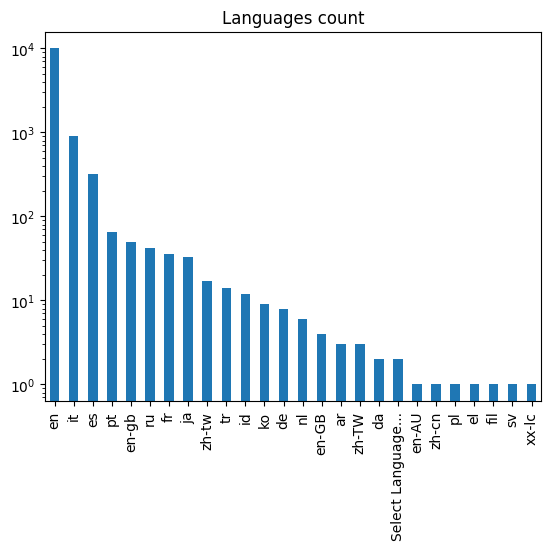

In [32]:
users['lang'].value_counts().plot(kind='bar', title='Languages count')
plt.yscale('log')
plt.show()

## Searching for invalid values in bot

In [33]:
users['bot'].unique()

array([1, 0])

## Searching for invalid created_at values

In [34]:
users['created_at'] = pd.to_datetime(users['created_at'], errors='coerce')
users[users['created_at'] > datetime.now()]['created_at'].count()

0

In [35]:
users[users['created_at'] < datetime.strptime("2006-07-15 00:00:00", "%Y-%m-%d %H:%M:%S")]['created_at'].count()

0

## Counting not numeric values in statuses_count

In [36]:
users['statuses_count'].unique()

array([7.6000e+01, 5.4000e+01, 3.0000e+00, ..., 1.1688e+04, 3.0240e+03,
       5.2790e+03])

# Data Visualization

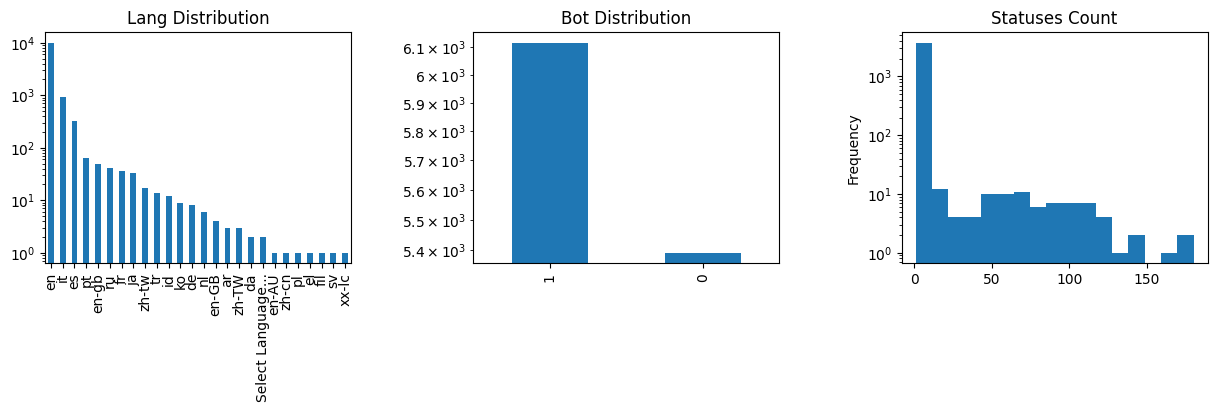

In [37]:
fig = plt.figure(figsize=(15, 3))
fig_dims = (1,3)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

###fig 1
plt.subplot2grid(fig_dims, (0,0))
users['lang'].value_counts().plot.bar(logy=True, title='Lang Distribution')
plt.yscale('log')


###fig 2
plt.subplot2grid(fig_dims, (0,1))
users['bot'].value_counts().plot.bar(title='Bot Distribution')
plt.yscale('log')

###fig 3
plt.subplot2grid(fig_dims, (0,2))
users['statuses_count'].value_counts().plot.hist(bins=round(math.log2(users.size) + 1), logy=True, title='Statuses Count')
plt.yscale('log')

## Outlier Analysis

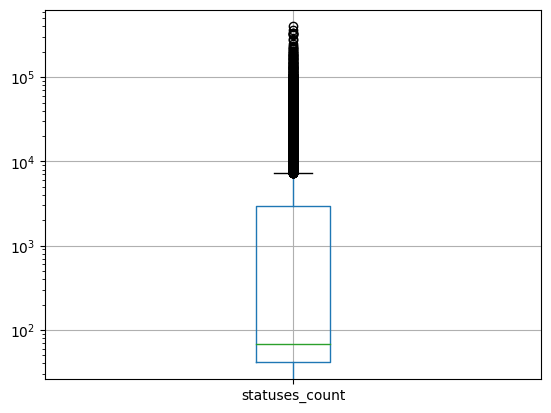

In [38]:
users.boxplot(column=['statuses_count'])
plt.yscale('log')